In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ghibtools as gh
from compute_global_dataframes import relaxation_concat_job, hrv_concat_job, resp_features_concat_job, rsa_concat_job, bmrq_concat_job
from configuration import *
from params import *

# SAVE PARAMS

In [3]:
save_folder = base_folder / 'Figures' / 'tempo_music'

# MUSIC SCORING

In [4]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Raw_Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_musiques_relatives_{participant}_bis.xlsx', index_col = 0)
    concat.append(df_participant)
cotations_relatives_musiques = pd.concat(concat)

In [5]:
cotations_relatives_musiques['tempo'] = cotations_relatives_musiques['musique_num'].map(tempos)
cotations_relatives_musiques['music_name'] = cotations_relatives_musiques['musique_num'].map(music_mapper)

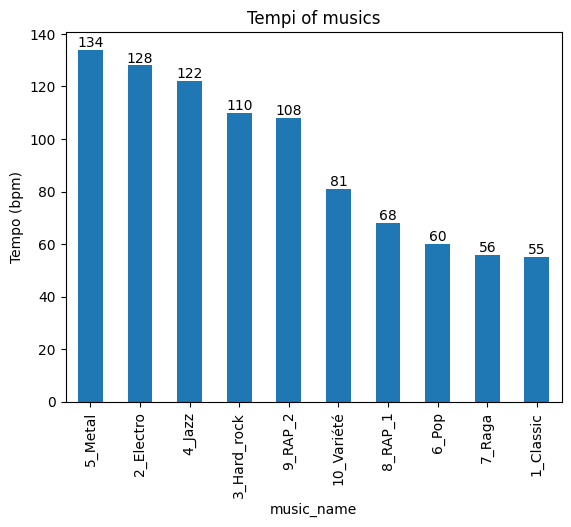

In [6]:
fig, ax = plt.subplots()
cotations_relatives_musiques.groupby('music_name')['tempo'].mean().sort_values(ascending = False).plot.bar(ax=ax)
ax.set_ylabel('Tempo (bpm)')
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title('Tempi of musics')
fig.savefig(save_folder / 'tempi_of_musics.png', dpi = 500, bbox_inches = 'tight')

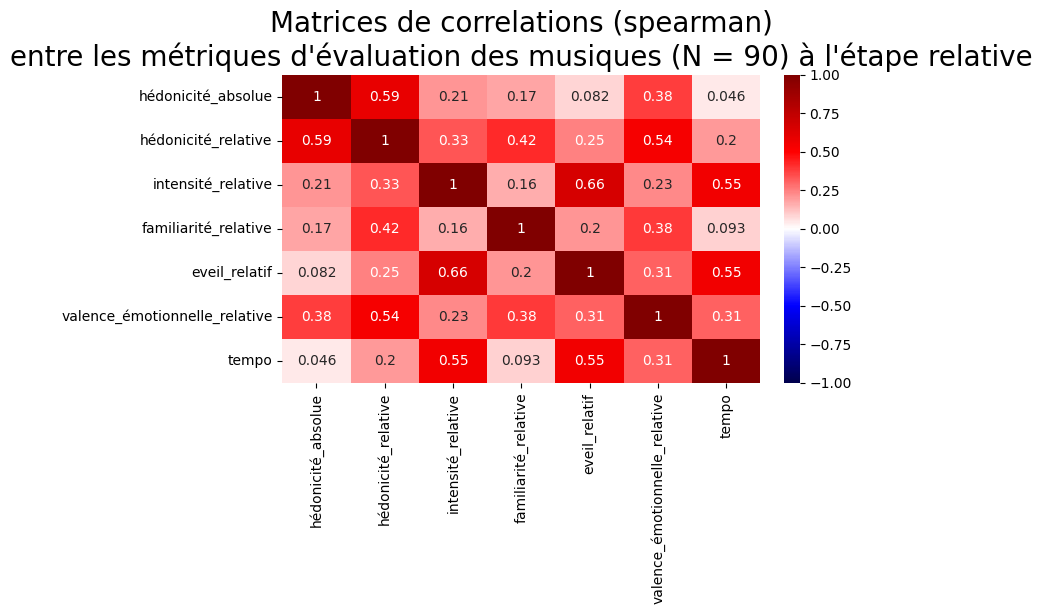

In [8]:
metrics = ['hédonicité_absolue','hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative','tempo']
corr_method = 'spearman'
N = cotations_relatives_musiques.shape[0]
fig, ax = plt.subplots(figsize = (8,6), constrained_layout = True)
ax.set_title(f"Matrices de correlations ({corr_method})\nentre les métriques d'évaluation des musiques (N = {N}) à l'étape relative", fontsize = 20)


sns.heatmap(cotations_relatives_musiques.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)


fig.savefig(save_folder / 'correlations_tempo_evaluation_relative.png', dpi = 500, bbox_inches = 'tight')

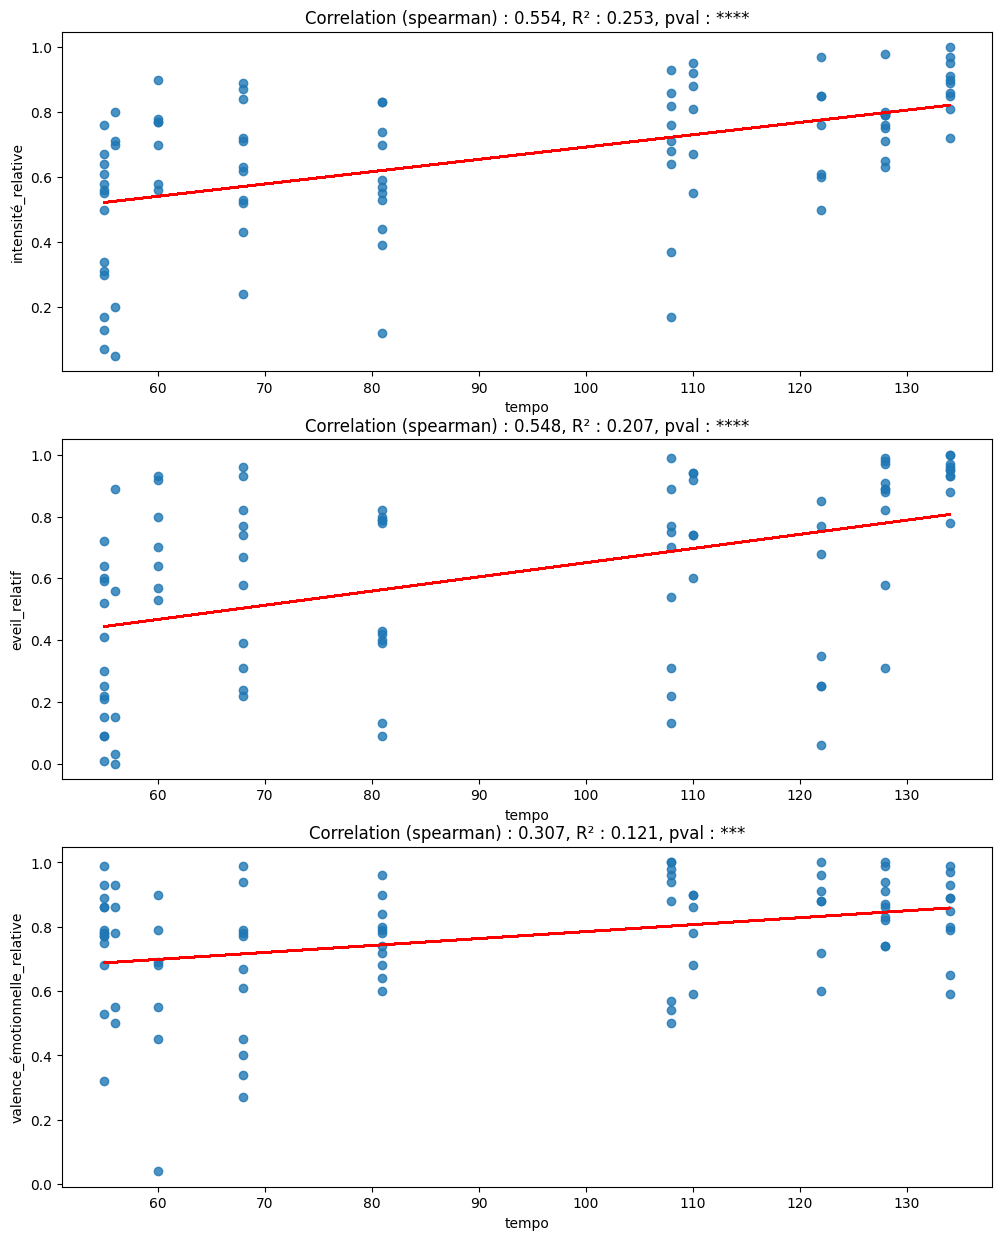

In [9]:
fig, axs = plt.subplots(nrows = 3, figsize = (12,15))
ax = axs[0]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'intensité_relative', ax=ax)
ax = axs[1]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'eveil_relatif', ax=ax)
ax = axs[2]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'valence_émotionnelle_relative', ax=ax)

fig.savefig(save_folder / 'stats_quantitative_evaluations_relatives_tempo.png', dpi = 500, bbox_inches = 'tight')

In [10]:
music_features = pd.DataFrame({'participant':chosen_musics.keys(),'chosen_music':chosen_musics.values()})
music_features['tempo'] = music_features['chosen_music'].map(tempos)
music_features

,participant,chosen_music,tempo
0,P01,10,81
1,P02,10,81
2,P03,10,81
3,P04,3,110
4,P05,9,108
5,P06,4,122
6,P07,7,56
7,P08,10,81
8,P09,9,108
9,P10,9,108


In [11]:
(music_features['tempo'] < 100).value_counts()

tempo
True     17
False    13
Name: count, dtype: int64

In [12]:
music_features.set_index('chosen_music')['tempo'] < 100

chosen_music
10     True
10     True
10     True
3     False
9     False
4     False
7      True
10     True
9     False
9     False
10     True
10     True
9     False
7      True
8      True
10     True
10     True
8      True
10     True
5     False
10     True
8      True
6      True
5     False
9     False
9     False
9     False
9     False
5     False
10     True
Name: tempo, dtype: bool

In [13]:
music_features['speed'] = np.nan
music_features['speed'] = music_features['tempo'] < 100
music_features['speed'] = music_features['speed'].map({True:'slow',False:'fast'})
music_features

,participant,chosen_music,tempo,speed
0,P01,10,81,slow
1,P02,10,81,slow
2,P03,10,81,slow
3,P04,3,110,fast
4,P05,9,108,fast
5,P06,4,122,fast
6,P07,7,56,slow
7,P08,10,81,slow
8,P09,9,108,fast
9,P10,9,108,fast


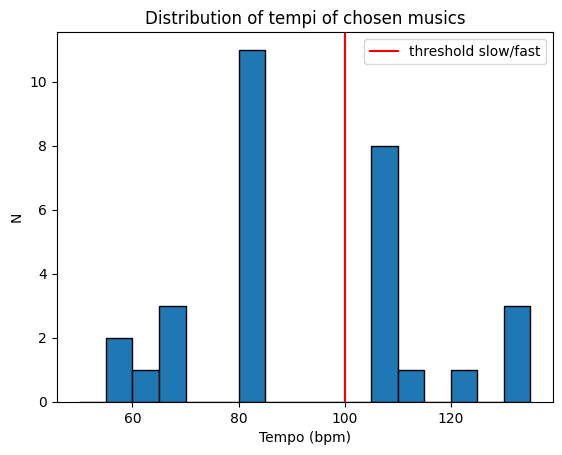

In [14]:
fig, ax = plt.subplots()
bins = np.arange(50, 140, 5)
tempi = music_features['tempo'].values
ax.hist(tempi, bins=bins, edgecolor = 'k')
ax.set_xlabel('Tempo (bpm)')
ax.set_ylabel('N')
ax.set_title('Distribution of tempi of chosen musics')
ax.axvline(100, label = 'threshold slow/fast', color = 'r')
ax.legend()
fig.savefig(save_folder / 'distribution_tempi_chosen_musics.png', dpi = 500, bbox_inches = 'tight')

In [15]:
bmrq = bmrq_concat_job.get(global_key).to_dataframe()

In [ ]:
music_features['BMRQ'] = music_features['participant'].map(bmrq[['participant','BMRQ']].set_index('participant').to_dict()['BMRQ'])

In [ ]:
gh.stats_quantitative(df = music_features, xlabel = 'BMRQ', ylabel = 'tempo')

# TEMPO ON RESPI

In [16]:
resp = resp_features_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
resp = resp.query("session == 'music'")
resp['tempo'] = resp['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
resp['speed'] = resp['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
resp.head(5)

,participant,session,inspi_index,expi_index,next_inspi_index,inspi_time,expi_time,next_inspi_time,cycle_duration,inspi_duration,...,expi_amplitude,total_volume,artifact,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,300864.0,301826.5,303446.0,300.8640,301.8265,303.4460,2.8435,0.9650,...,31.742696,69.078041,0.0,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,279438.0,280774.0,282702.5,279.4380,280.7740,282.7025,3.6515,1.4575,...,108.345036,218.460358,0.0,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,333286.0,334605.0,336552.0,333.2860,334.6050,336.5520,3.4750,1.2390,...,250.399121,284.263225,0.0,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,298824.5,299891.0,301914.0,298.8245,299.8910,301.9140,2.9295,1.0330,...,187.384160,263.028225,0.0,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,285961.0,287834.0,290457.0,285.9610,287.8340,290.4570,4.4720,1.5820,...,41.614774,133.770157,0.0,27.0,21.0,4.107738,3.200000,3.227273,108,fast


In [17]:
resp.columns

Index(['participant', 'session', 'inspi_index', 'expi_index',
       'next_inspi_index', 'inspi_time', 'expi_time', 'next_inspi_time',
       'cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo',
       'speed'],
      dtype='object')

<AxesSubplot: >

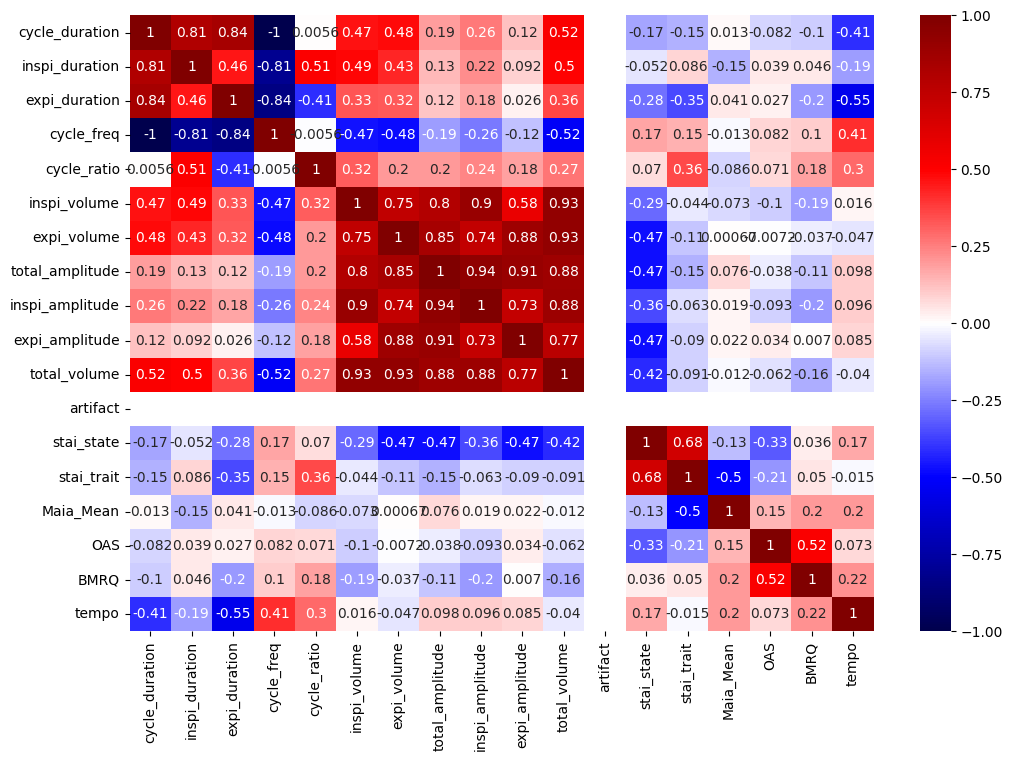

In [18]:
cols = ['cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo']

fig, ax=  plt.subplots(figsize = (12,8))
sns.heatmap(resp[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<AxesSubplot: title={'center': 'Correlation (spearman) : 0.412, R² : 0.179, pval : *'}, xlabel='tempo', ylabel='cycle_freq'>

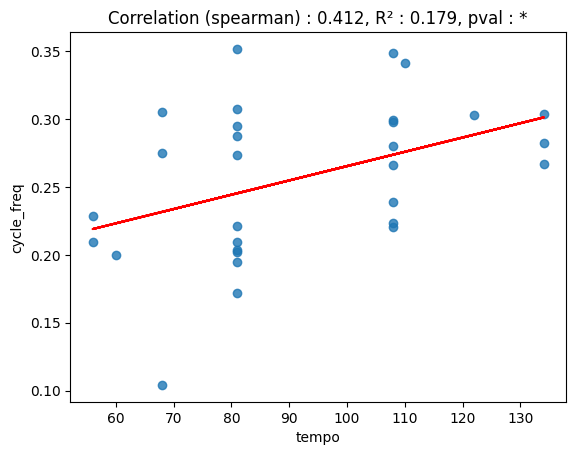

In [19]:
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_freq')

<AxesSubplot: title={'center': 'Effect of speed on cycle_duration : * \n Mann-Whitney : p = 0.045, CLES : 0.281 (S)'}, xlabel='speed', ylabel='cycle_duration'>

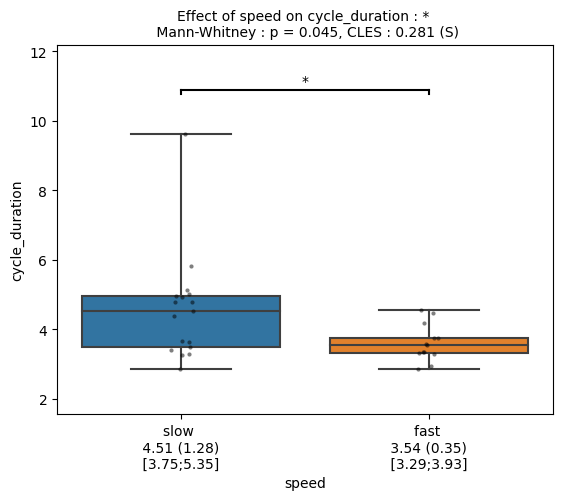

In [20]:
gh.auto_stats(df = resp, predictor = 'speed', outcome = 'cycle_duration', design = 'between')

# TEMPO ON HRV

In [21]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv = hrv.query("session == 'music'")
hrv['tempo'] = hrv['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
hrv['speed'] = hrv['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [22]:
hrv.columns

Index(['participant', 'session', 'HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo', 'speed'],
      dtype='object')

<AxesSubplot: >

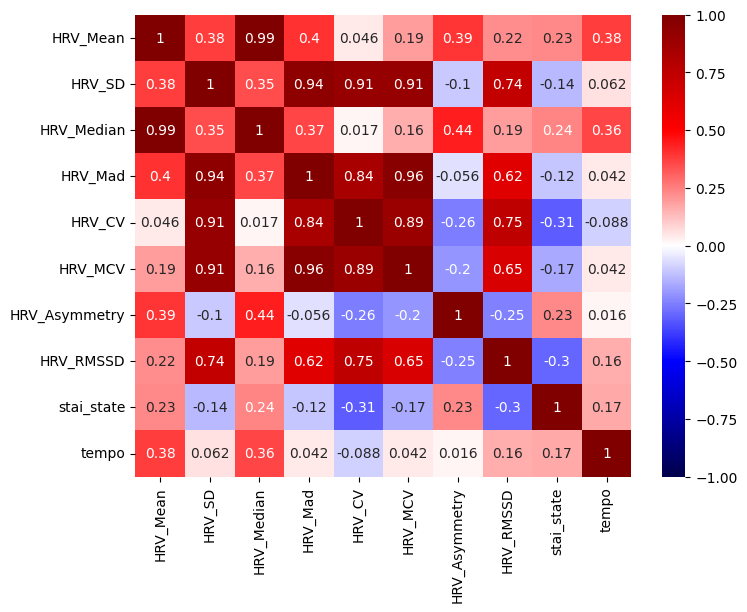

In [23]:
cols = ['HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(hrv[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<AxesSubplot: title={'center': 'Correlation (spearman) : 0.359, R² : 0.165, pval : *'}, xlabel='tempo', ylabel='HRV_Median'>

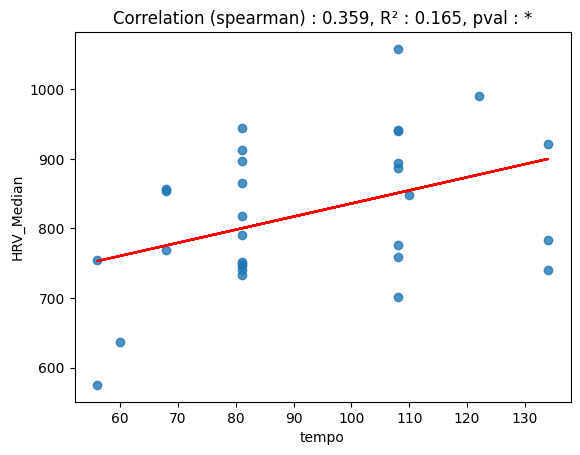

In [24]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median')

<AxesSubplot: title={'center': 'Correlation (pearson) : 0.406, R² : 0.165, pval : *'}, xlabel='tempo', ylabel='HRV_Median'>

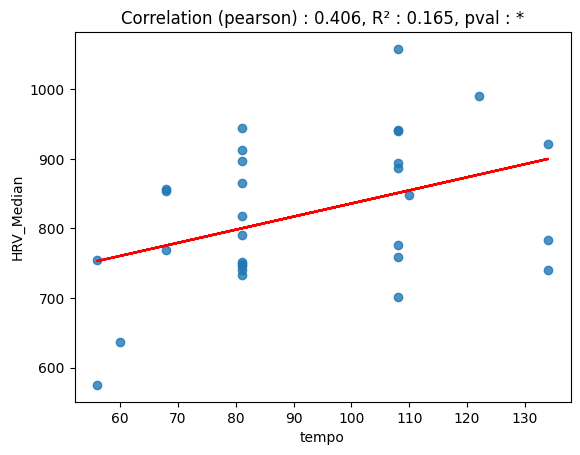

In [33]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median', corr_method = 'pearson')

<AxesSubplot: title={'center': 'Correlation (spearman) : 0.042, R² : 0.001, pval : ns'}, xlabel='tempo', ylabel='HRV_Mad'>

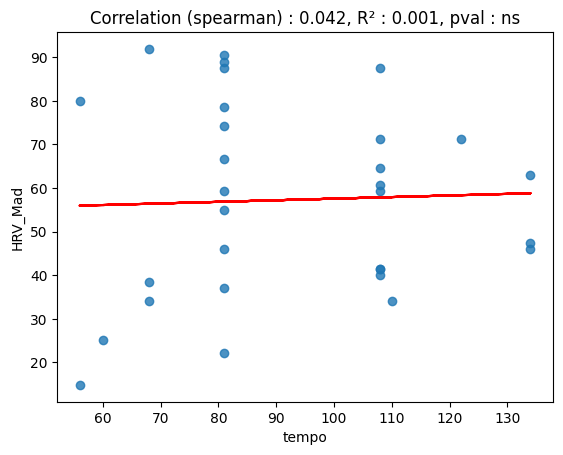

In [25]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

<AxesSubplot: title={'center': 'Correlation (spearman) : 0.042, R² : 0.001, pval : ns'}, xlabel='tempo', ylabel='HRV_Mad'>

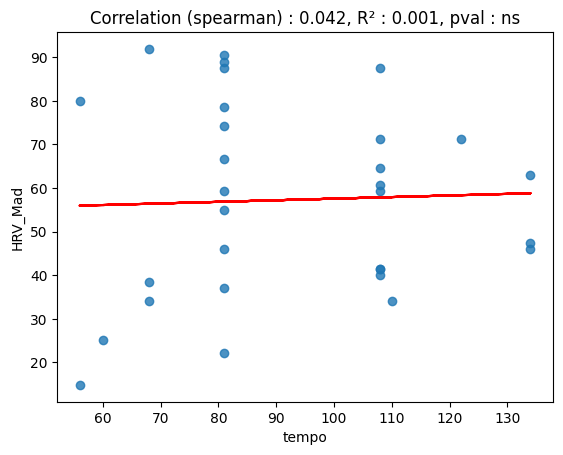

In [26]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

<AxesSubplot: title={'center': 'Effect of speed on HRV_Mad : ns \n Mann-Whitney : p = 0.802, CLES : 0.471 (S)'}, xlabel='speed', ylabel='HRV_Mad'>

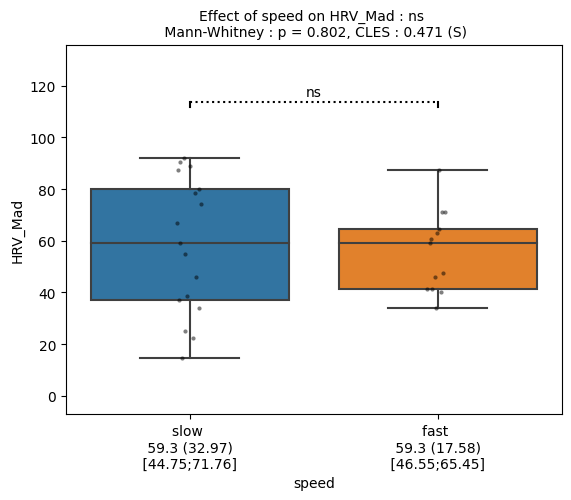

In [27]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Mad', design = 'between')

<AxesSubplot: title={'center': 'Effect of speed on HRV_Median : ns \n t-test_ind : p = 0.053, cohen-d : 0.762 (M)'}, xlabel='speed', ylabel='HRV_Median'>

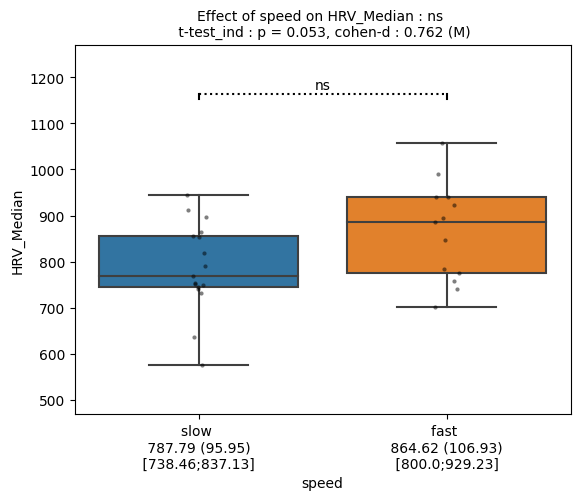

In [28]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Median', design = 'between')

# TEMPO ON RSA

In [29]:
rsa = rsa_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
rsa = rsa.query("session == 'music'")
rsa['tempo'] = rsa['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
rsa['speed'] = rsa['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
rsa.head(5)

,participant,session,peak_index,trough_index,peak_time,trough_time,peak_value,trough_value,rising_amplitude,decay_amplitude,...,decay_duration,rising_slope,decay_slope,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,3016.5,3030.5,301.7140,303.1140,83.910902,80.030339,3.572436,3.586949,...,1.5,2.538447,2.514716,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,2806.0,2822.0,280.6380,282.2380,85.950638,75.508218,9.846101,10.017317,...,2.0,5.363314,5.708185,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,3345.0,3364.0,334.5860,336.4860,85.806562,74.936715,9.560027,9.429559,...,2.1,5.825576,4.664901,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,3002.5,3015.0,300.2745,301.5245,73.395625,68.989958,3.830236,3.925862,...,1.7,3.269927,2.454877,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,2872.0,2899.0,287.2610,289.9610,66.289331,60.483193,5.035702,4.860366,...,2.6,2.116911,2.327392,27.0,21.0,4.107738,3.200000,3.227273,108,fast


<AxesSubplot: title={'center': 'Correlation (spearman) : -0.132, R² : 0.052, pval : ns'}, xlabel='tempo', ylabel='decay_amplitude'>

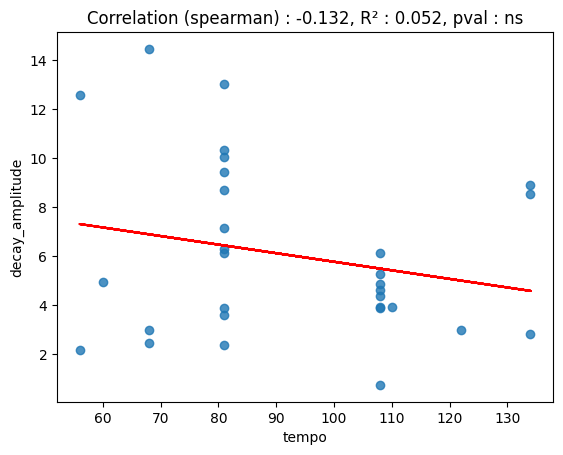

In [30]:
gh.stats_quantitative(df = rsa, xlabel = 'tempo', ylabel = 'decay_amplitude')

<AxesSubplot: title={'center': 'Effect of speed on decay_amplitude : ns \n Mann-Whitney : p = 0.18, CLES : 0.353 (S)'}, xlabel='speed', ylabel='decay_amplitude'>

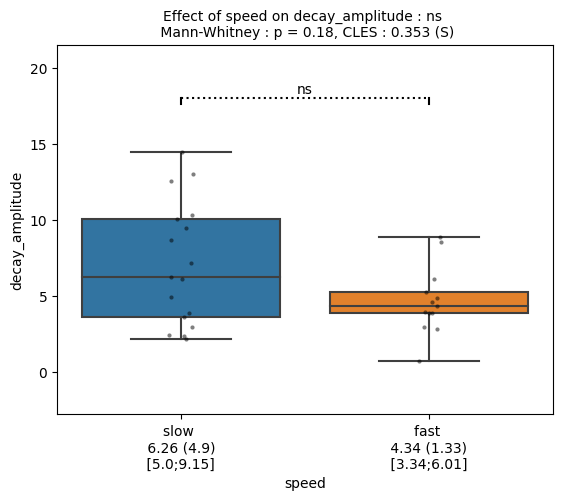

In [31]:
gh.auto_stats(df = rsa, predictor = 'speed', outcome = 'decay_amplitude', design = 'between')

# TEMPO ON PSYCHO

In [ ]:
psycho = relaxation_concat_job.get(global_key).to_dataframe()
psycho = psycho.query("session == 'music'")
psycho['tempo'] = psycho['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
psycho['speed'] = psycho['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [ ]:
psycho.columns

In [ ]:
cols = ['Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(psycho[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

In [ ]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Arousal')

In [ ]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Relaxation_intensity')

In [ ]:
gh.auto_stats(df = psycho, predictor = 'speed', outcome = 'Relaxation_intensity', design = 'between')

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6), constrained_layout = True)
ax = axs[0,0]
gh.auto_stats(df = resp, predictor = 'speed', outcome = 'cycle_duration', design = 'between', ax=ax, outcome_clean_label='Cycle Duration', outcome_unit = 'sec')
ax.set_title('Effect of tempo on respiratory cycle duration \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[0,1]
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Median', design = 'between', ax=ax, outcome_clean_label='Median RRi', outcome_unit = 'ms')
ax.set_title('Effect of tempo on Median RRi \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[1,0]
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Mad', design = 'between', ax=ax, outcome_clean_label='HRV MAD', outcome_unit = 'ms')
ax.set_title('Effect of tempo on HRV MAD \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[1,1]
gh.auto_stats(df = psycho, predictor = 'speed', outcome = 'Relaxation_intensity', design = 'between', ax=ax, outcome_clean_label='Relaxation', outcome_unit = '/100')
ax.set_title('Effect of tempo on subjective relaxation \n {}'.format(ax.get_title().split('\n')[-1]))

letters = ['A)','B)','C)','D)']
for i, ax in enumerate(axs.flatten()):
    ax.set_xlabel('Tempo')
    ax2 = ax.twinx()
    ax2.set_title(letters[i], loc = 'left', fontsize = 15)
    ax2.axis('off')

fig.savefig(save_folder / 'stats_quali_quanti_tempo_resp_hrv_psycho.png', dpi = 500, bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots()
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_freq', ax=ax)

In [ ]:

global_fontsize = 12
letter_fontsize = 15

letters = ['A)','B)','C)','D)']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (9,6), constrained_layout = True)
ax = axs[0,0]
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_duration', ax=ax)
ax.set_ylabel('Cycle Duration [sec]', fontsize = global_fontsize)
ax = axs[0,1]
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median', ax=ax)
ax.set_ylabel('Median RRi [ms]', fontsize = global_fontsize)
ax = axs[1,0]
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad', ax=ax)
ax.set_ylabel('HRV MAD [ms]', fontsize = global_fontsize)
ax = axs[1,1]
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Relaxation_intensity', ax=ax)
ax.set_ylabel('Subjective relaxation [/100]', fontsize = global_fontsize)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(ax.get_title(), fontsize = global_fontsize)
    ax.set_xlabel('Tempo [bpm]', fontsize = global_fontsize)
    ax2 = ax.twinx()
    ax2.set_title(letters[i], loc = 'left', fontsize = letter_fontsize)
    ax2.axis('off')

fig.savefig(save_folder / 'stats_quanti_quanti_tempo_resp_hrv_psycho.png', dpi = 500, bbox_inches = 'tight')